# Modelo de varianzas homogéneas

In [4]:
modelo=gls(ocupacion~region, data=datos)

,numDF,F-value,p-value
(Intercept),1,2793.255418,3.285837e-46
region,4,5.268349,1.250077e-03


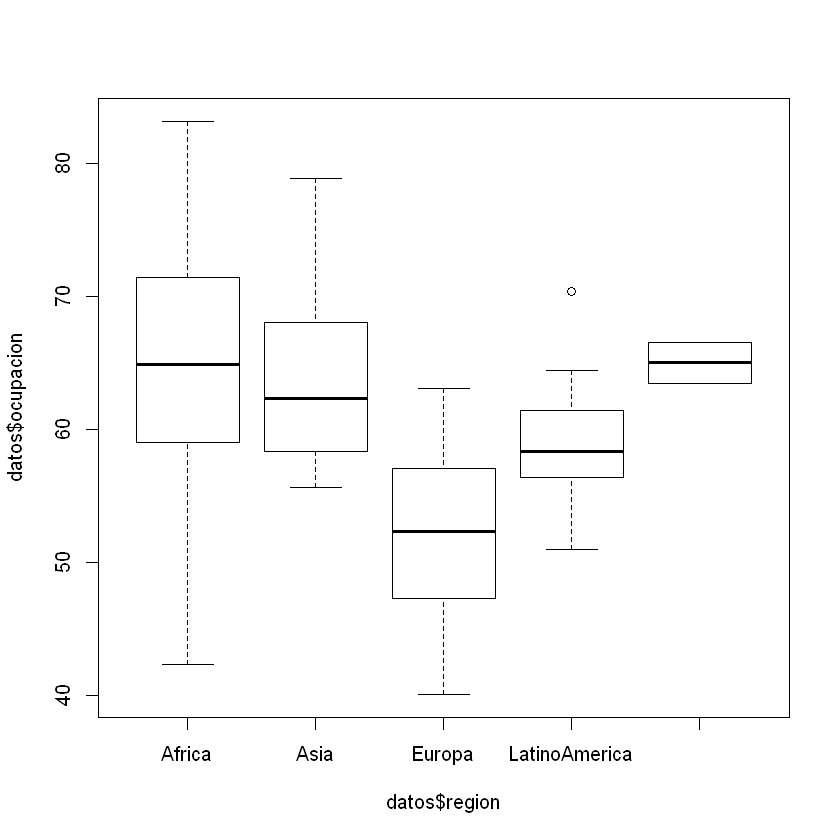

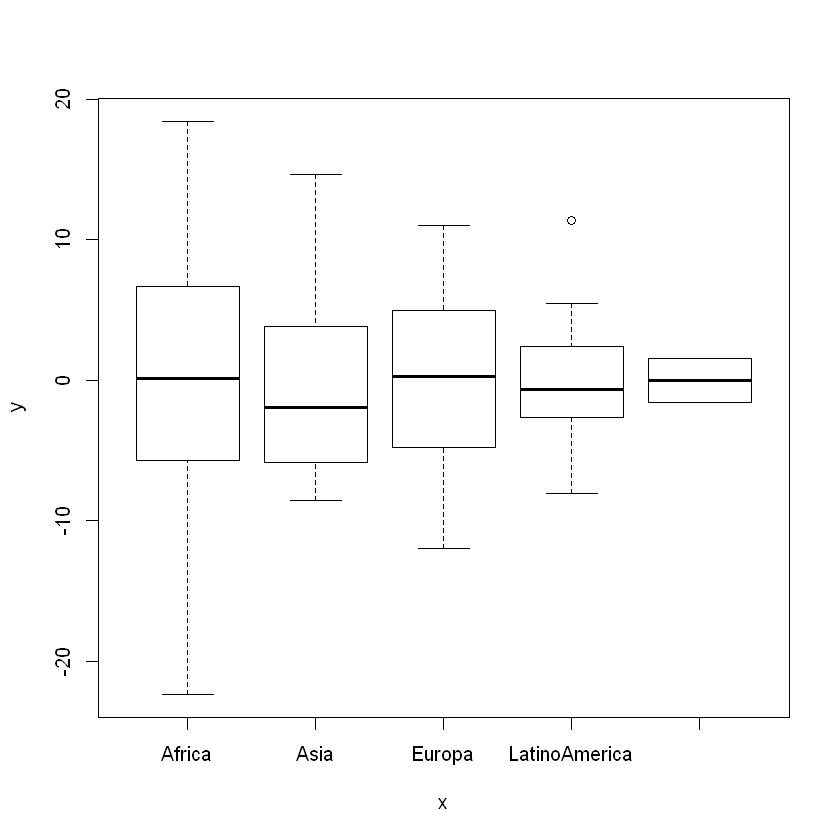

In [5]:
anova(modelo)
par(mfrow=c(1,1))
boxplot(datos$ocupacion~datos$region)
datos$residuos=resid(modelo) 
plot(datos$region,datos$residuos)

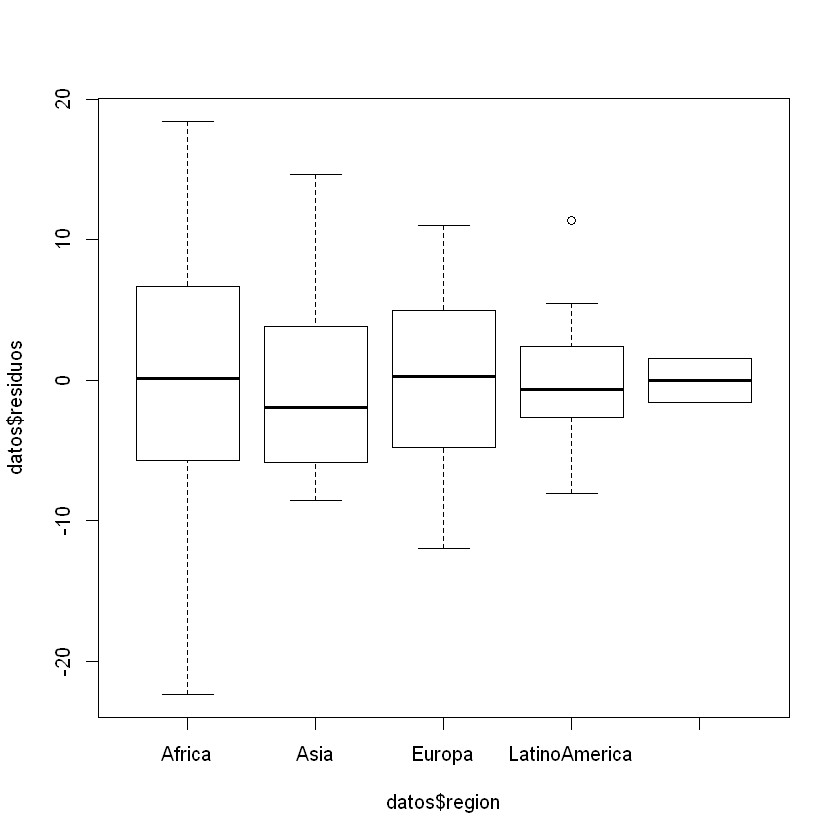

In [6]:
# Otra opción para el gráfico de caja y bigotes (boxplot, en inglés)
boxplot(datos$residuos~datos$region)

El largo de los bigotes está definido por 1,5 veces la amplitud intercuartilar. Sin embargo, los bigotes pueden ser asimétricos (como en Asia) porque el final del bigote se ubica en el punto más extremo dentro de este rango. To- dos aquellos valores que estén por fuera de «1,5 *» Rango Intercuartilar se grafican como puntos.

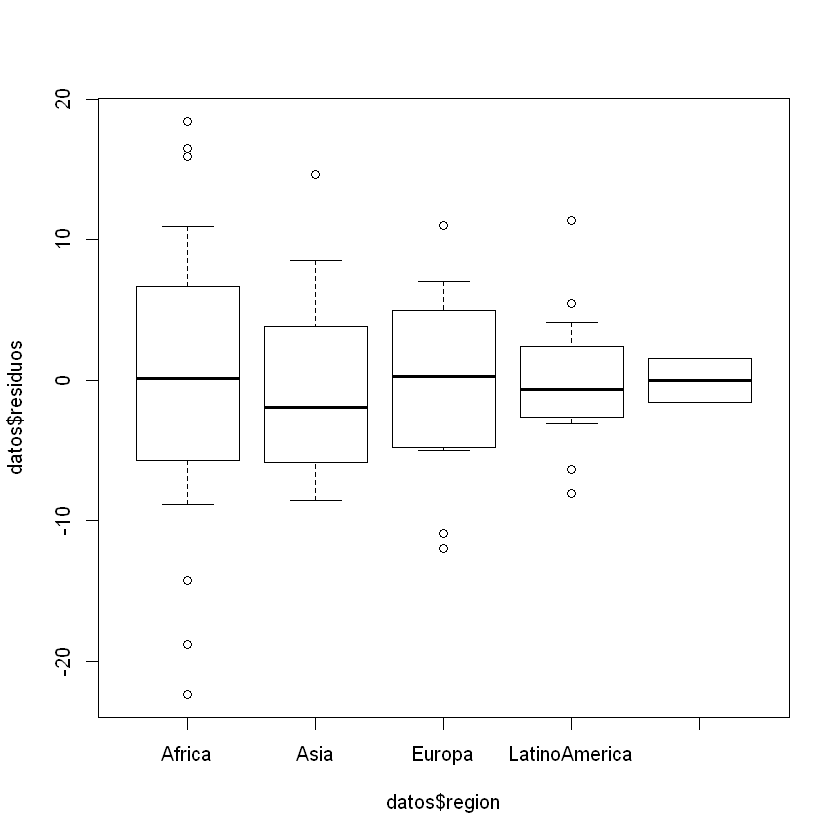

In [7]:
# El tamaño de los bigotes puede modificarse con el código «range» como vemos a continuación: 
boxplot(datos$residuos~datos$region, range =0.5)

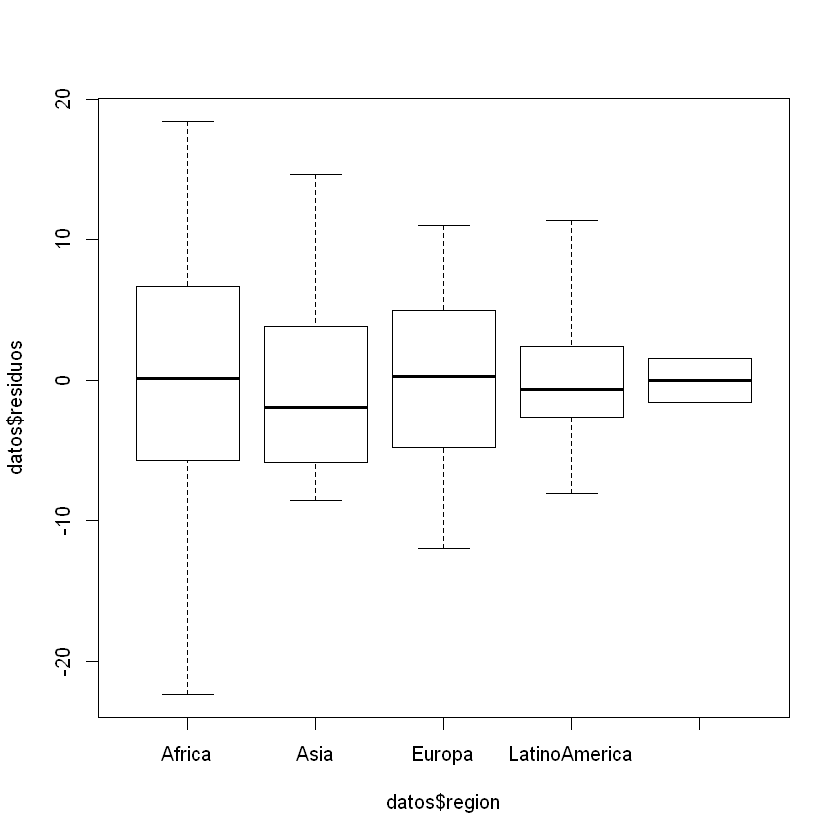

In [8]:
# Sucede lo opuesto si damos un valor más alto a «range»: 
boxplot(datos$residuos~datos$region, range = 2)

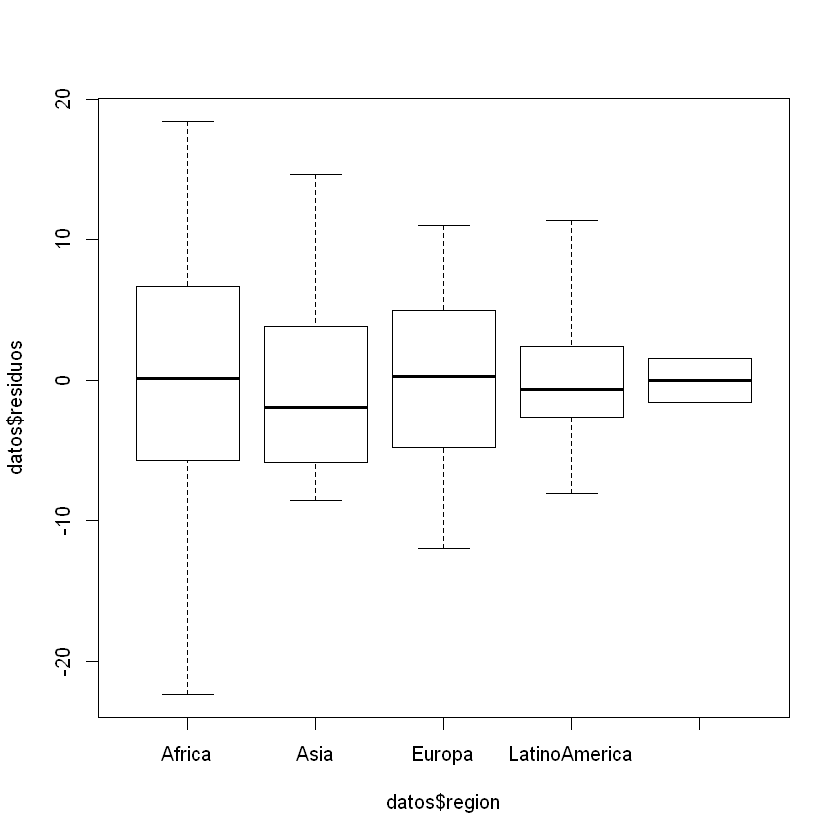

In [9]:
# Si queremos que el límite inferior y el superior de los bigotes sean los valores mínimos y máximos en cada región ponemos «range = 0». 
boxplot(datos$residuos~datos$region, range = 0)


Africa          Asia        Europa LatinoAmerica    NorAmerica 
    11.399132      7.505857      6.689080      5.449838      2.192030

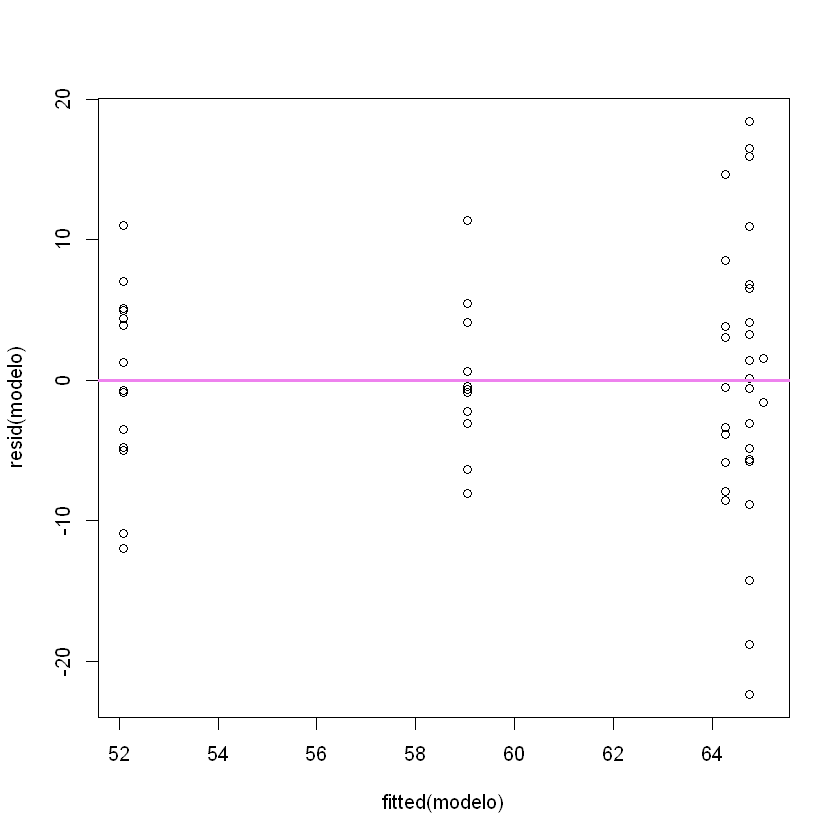

In [10]:
tapply(datos$residuos,datos$region,sd) 
plot(fitted(modelo),resid(modelo)) 
abline(a=0,b=0, col="violet", lw=3)

In [11]:
# Otro gráfico interesante (sin acentos en las secuencias): 
medias=with(datos,tapply(ocupacion,region,mean)) 
medias
desvios=with(datos,tapply(ocupacion,region,sd)) 
desvios

Africa          Asia        Europa LatinoAmerica    NorAmerica 
     64.76316      64.27000      52.09286      59.04545      65.05000

Africa          Asia        Europa LatinoAmerica    NorAmerica 
    11.399132      7.505857      6.689080      5.449838      2.192030

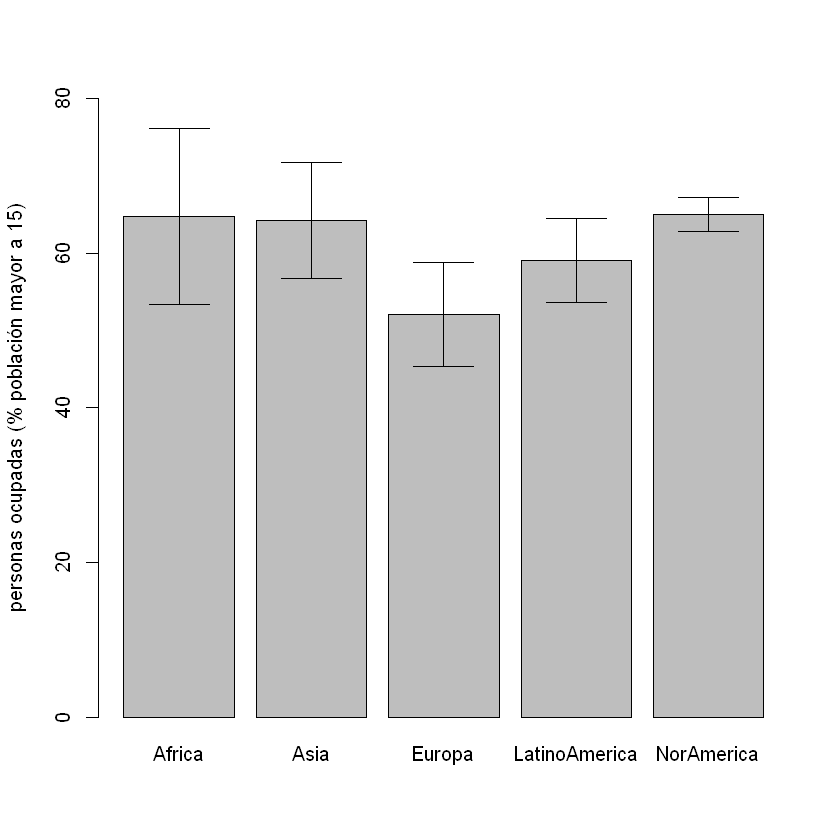

In [12]:
# Estamos graficando el desvío estándar y no el error estándar. 
# ¿Cuál es la diferencia entre ambos? 
fig = barplot(medias,ylim=c(0,80),ylab= "personas ocupadas (% población mayor a 15)") 
arrows(fig,medias+desvios,fig,medias-desvios, angle=90,code=3)

In [13]:
# ¿Por qué ambas secuencias dan los mismos valores? 
with(datos,tapply(ocupacion,region,sd))
tapply(datos$residuos,datos$region,sd)

Africa          Asia        Europa LatinoAmerica    NorAmerica 
    11.399132      7.505857      6.689080      5.449838      2.192030

Africa          Asia        Europa LatinoAmerica    NorAmerica 
    11.399132      7.505857      6.689080      5.449838      2.192030

# 13. 3. Modelo de varianzas heterogéneas según región

«Var[i] = (DesvíoEstándar * Beta[i])^2»

«DesvíoEstándar»: de una región que se toma como base. En el «summary» se presenta como «Residual standard error».

«Beta[i]»: hay tantos Betas como grupos menos 1. Es el desvío estándar del grupo de interés dividido el desvío estándar del grupo que se toma como base.

In [14]:
modident = gls(ocupacion~region, weights=varIdent(form=~ 1|region),data=datos)

Escriba la función de verosimilitud para este modelo y el anterior. Explique las diferencias.

In [15]:
summary(modident)

Generalized least squares fit by REML
  Model: ocupacion ~ region 
  Data: datos 
       AIC      BIC    logLik
  384.4923 403.8105 -182.2461

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | region 
 Parameter estimates:
         Asia        Europa        Africa LatinoAmerica    NorAmerica 
    1.0000000     0.8911821     1.5186985     0.7260788     0.2920424 

Coefficients:
                        Value Std.Error   t-value p-value
(Intercept)          64.76316  2.615139 24.764706  0.0000
regionAsia           -0.49316  3.531676 -0.139638  0.8895
regionEuropa        -12.67030  3.167798 -3.999719  0.0002
regionLatinoAmerica  -5.71770  3.088531 -1.851269  0.0699
regionNorAmerica      0.28684  3.039975  0.094357  0.9252

 Correlation: 
                    (Intr) regnAs rgnErp rgnLtA
regionAsia          -0.740                     
regionEuropa        -0.826  0.611              
regionLatinoAmerica -0.847  0.627  0.699       
regionNorAmerica    -0.860

Interprete el «summary» en conjunto con el gráfico realizado arriba («bar- plot»). Según este modelo, 
¿cuál es la varianza en la ocupación entre países en América Latina?

In [16]:
# Comparamos con el modelo que supone homogeneidad de varianzas: 
anova(modelo,modident)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
modelo,"gls(model = ocupacion ~ region, data = datos)",1,6,386.6105,398.2015,-187.3053,,NA,NA
modident,"gls(model = ocupacion ~ region, data = datos, weights = varIdent(form = ~1 | region))",2,10,384.4923,403.8105,-182.2461,1 vs 2,10.11826,0.03848204


El modelo con homogeneidad de varianzas está anidado dentro del «modi- dent». ¿Por qué?

In [17]:
Verificamos que se solucionó el problema de heterogeneidad de varianzas.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:13: unexpected symbol
1: Verificamos que
                ^


Africa          Asia        Europa LatinoAmerica    NorAmerica 
    1.0000004     1.0000005     0.9999996     0.9999993     1.0000012

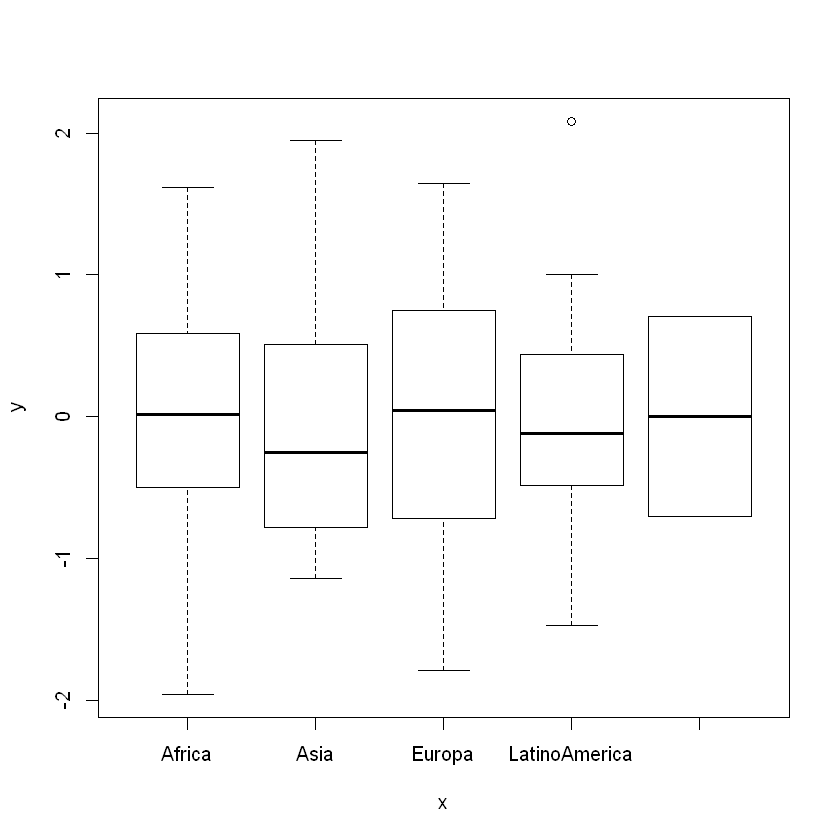

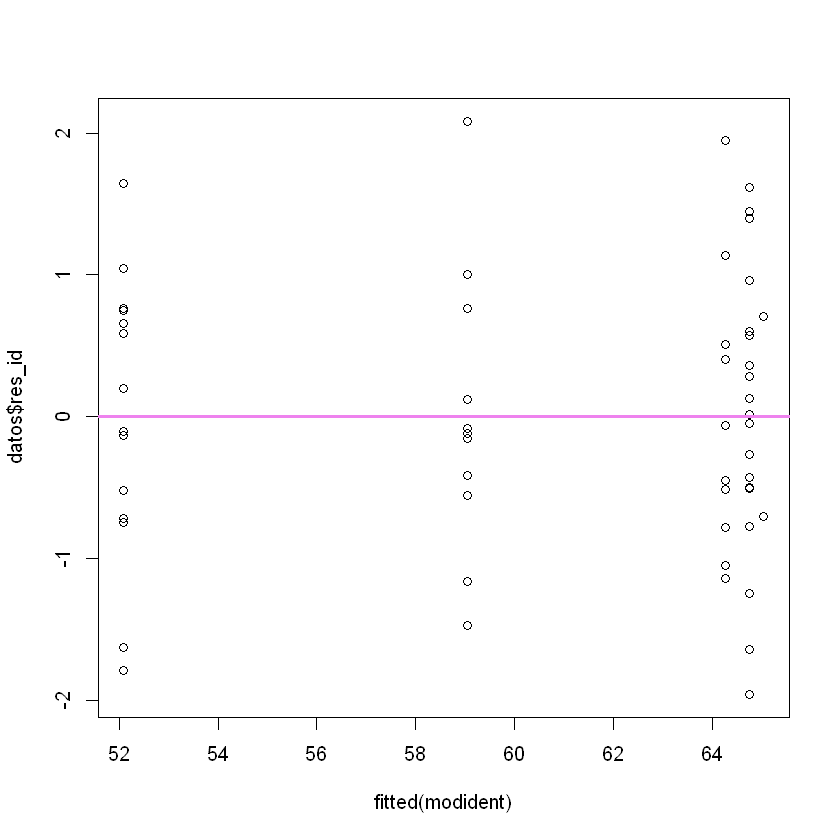

In [18]:
datos$res_id=resid(modident,type="pearson")

plot(datos$region,datos$res_id)

tapply(datos$res_id,datos$region,sd)

plot(fitted(modident),datos$res_id) 
abline(a=0, b=0, col="violet", lw=3)


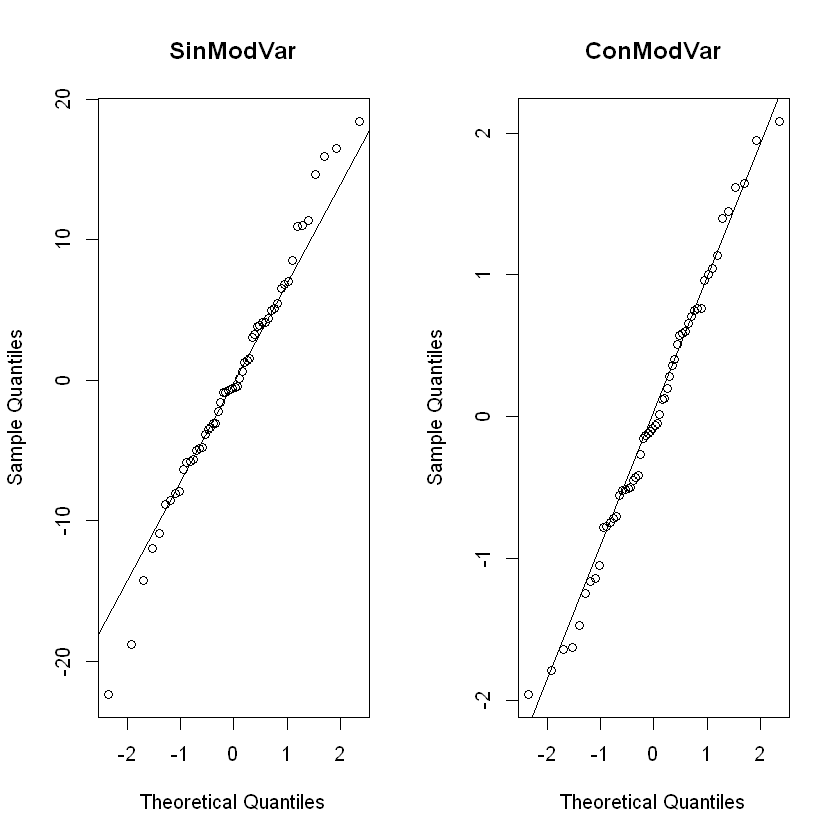

In [19]:
# Comparamos la normalidad para los residuos entre los modelos con y sin heterogeneidad de varianzas:
layout(matrix(1:2,1,2)) 
qqnorm(datos$residuos, main="SinModVar") 
qqline(datos$residuos) 
qqnorm(datos$res_id, main="ConModVar") 
qqline(datos$res_id)

## 13. 4. Prueba del cociente de verosimilitudes

In [20]:
# Volvamos al anova: 
anova(modelo,modident)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
modelo,"gls(model = ocupacion ~ region, data = datos)",1,6,386.6105,398.2015,-187.3053,,NA,NA
modident,"gls(model = ocupacion ~ region, data = datos, weights = varIdent(form = ~1 | region))",2,10,384.4923,403.8105,-182.2461,1 vs 2,10.11826,0.03848204


In [21]:
# Plantear la «H_0)» y «la H_alt)».
# «L.Ratio»:

In [22]:
L.Ratio = - 2 * (-187.3053 - (-182.2461)) 
L.Ratio

[1] 10.1184

En este caso los grados de libertad son 4, que es la diferencia en el número de parámetros. ¿Cuáles son los parámetros que difieren entre ambos mo- delos? Podemos entonces calcular la probabilidad de encontrar un valor de «L.Ratio» de 10.12 o mayor si la hipótesis nula que indica que no hay dife- rencias entre la verosimilitud de los modelos sin y con heterogeneidad de varianzas fuese cierta.

In [23]:
1 - pchisq(L.Ratio,4)

[1] 0.03847979

In [24]:
Vemos que da lo mismo que el valor obtenido a partir de la función «anova(modelo,modident)».

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: Vemos que
          ^


In [25]:
El «lrt» solo sirve para comparar modelos anidados.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected input
1: El «
       ^


# Ver: ?pchisq  
En el capítulo 8 analizaremos esta distribución con más detalle.

In [26]:
# «aic» 
# Modelo sin heterogeneidad de varianzas: 
-2 * -187.3053 + 2 * 6

[1] 386.6106

Son 6 parámetros porque hay 5 regiones más una varianza. Recordemos que en la función de verosimilitud utilizando la distribución normal em- pleamos tanto la media como la varianza.

In [27]:
# Modelo con heterogeneidad de varianzas: 
-2 * -182.2461 + 2 * 10

[1] 384.4922

Son 10 parámetros porque estimamos una media y una varianza para cada una de las 5 regiones

In [28]:
# «bic» 
# Modelo sin heterogeneidad de varianzas: 
-2 * -187.3053 + 6 * log(51)
# «log(51)» porque con el método reml se usa «n - p (parámetros del compo- nente fijo) = 51», es decir, 
# los grados de libertad residuales. Recordemos que en R «log» es «ln», a menos que se especifique lo contrario, 
" por ejemplo «“log10”».

ERROR: Error in parse(text = x, srcfile = src): <text>:6:1: inesperado INCOMPLETE_STRING
5: # los grados de libertad residuales. Recordemos que en R «log» es «ln», a menos que se especifique lo contrario, 
6: " por ejemplo «“log10”».
   ^


# «bic» 

In [29]:
# Modelo sin heterogeneidad de varianzas: 

-2 * -187.3053 + 6 * log(51)

# «log(51)» porque con el método reml se usa «n - p (parámetros del compo- nente fijo) = 51», 
# es decir, los grados de libertad residuales. Recordemos que en R «log» es «ln», 
# a menos que se especifique lo contrario, por ejemplo «“log10”».

[1] 398.2016

In [30]:
# Modelo con heterogeneidad de varianzas: 
-2 * -182.2461 + 10 * log(51)

[1] 403.8105

Como es de esperar el «bic» favorece modelos más simples (con menos pa- rámetros) que el «aic».

In [31]:
# Es interesante saber el tipo de funciones disponibles para modelar la varianza:
?varClasses

Recuerden lo que dice al final respecto de que pueden incorporar cualquier función que deseen simplemente con un poco más de notación.

## Trabajo práctico Nº 14. Varianzas en función de variable independiente cuantitativa

# 14. 1. Problema y datos


In [32]:
datos=read.table("datos_p_9.txt") 
colnames(datos)=c("pais","vida","pbi")

Volvemos sobre un ejemplo introducido en el capítulo 4. Recordemos que estudiamos cómo varía la esperanza de vida (años) en función del pbi per cápita (dólares por habitante por año).

¿Cuál es la unidad experimental?

# 14. 2. Modelo con varianzas homogéneas usando «lm»

Continuamos con el mejor de los modelos encontrados en el trabajo práctico nº 9

In [33]:
modelo3=lm(vida~log10(pbi),data=datos) 
summary(modelo3)


Call:
lm(formula = vida ~ log10(pbi), data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.074  -2.134   1.058   3.738  11.411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.613      3.160   3.675 0.000316 ***
log10(pbi)    15.075      0.827  18.229  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.1 on 175 degrees of freedom
Multiple R-squared:  0.655,	Adjusted R-squared:  0.6531 
F-statistic: 332.3 on 1 and 175 DF,  p-value: < 2.2e-16


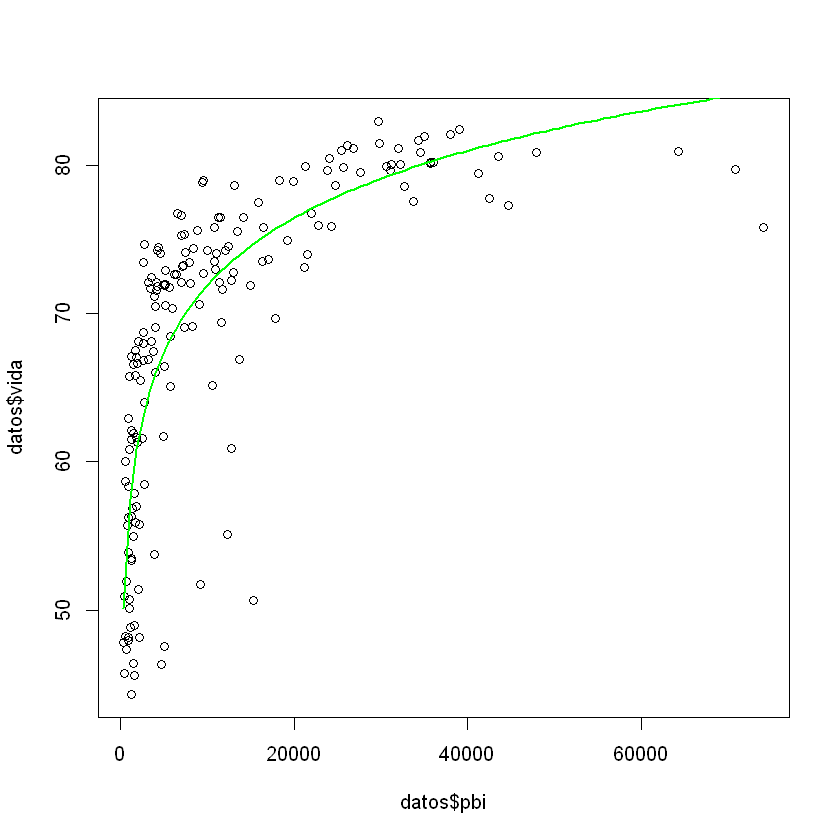

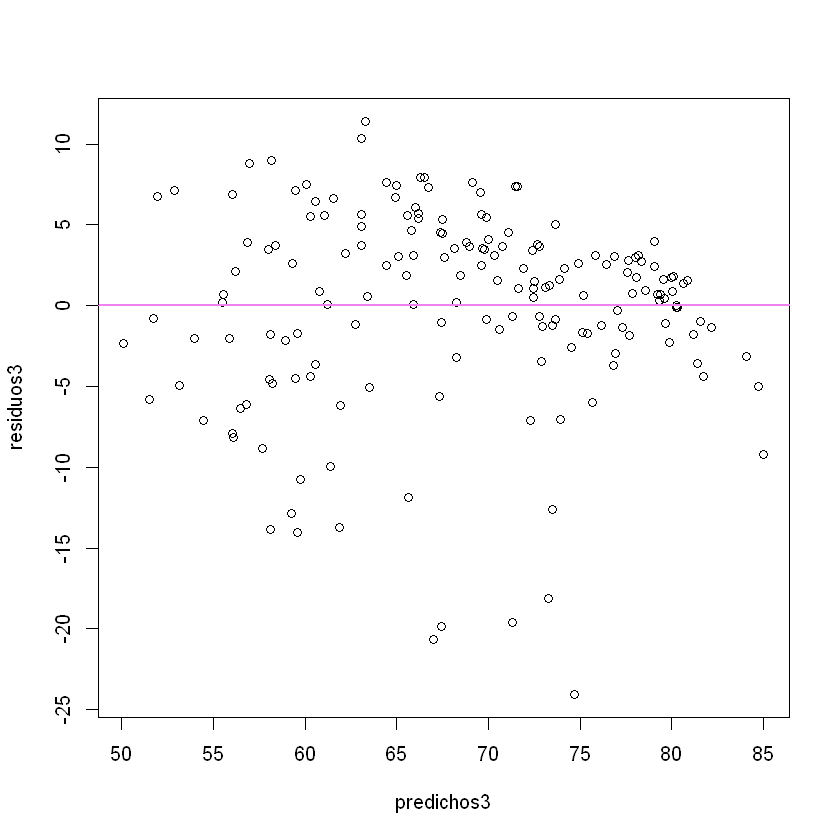

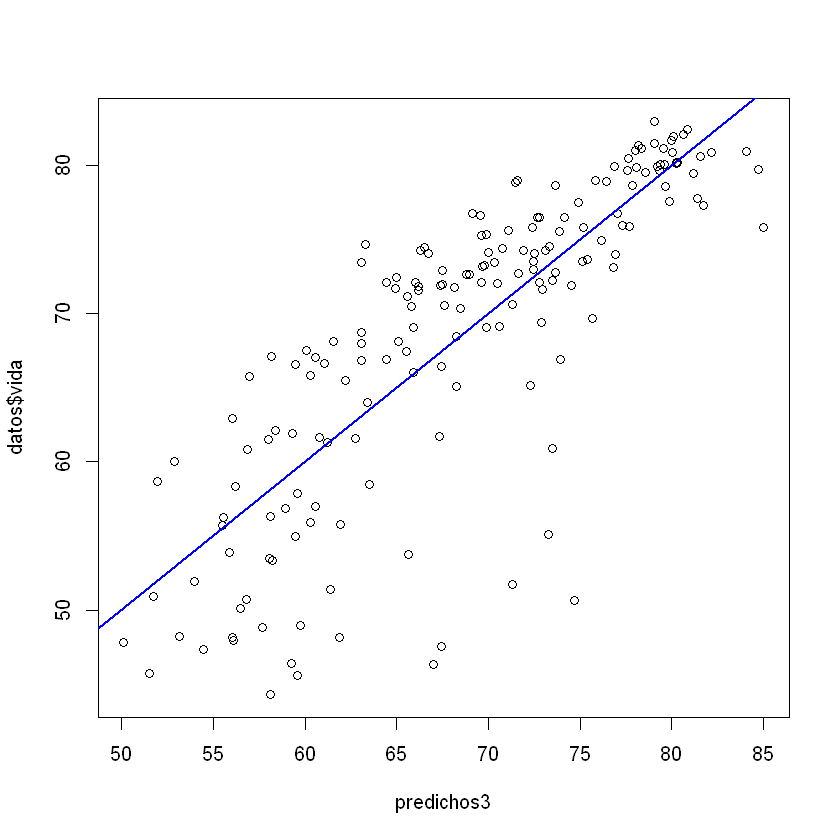

In [34]:
# Observados versus variable independiente: 
plot(datos$pbi,datos$vida)

# Agregamos la línea que une los valores predichos: 
curve(modelo3$coefficients[1]+modelo3$coefficients[2]*log10(x), add=T, col="green", lw=2)

# Residuos versus predichos: 
residuos3=resid(modelo3) 
predichos3=fitted(modelo3) 
plot(predichos3,residuos3) 
abline(a=0,b=0, col="violet", lw=2)

# Observados versus predichos: 
plot(predichos3,datos$vida) 
abline(a=0,b=1, col="blue", lw=2)

# Figura 14. 1. Esperanza de vida en años en función de los valores predichos 
# para la esperanza de vida en años según el modelo estimado

Nota: Este gráfico compara los valores observados con los predichos. Si el modelo es adecuado, los puntos deberían alinearse de manera homogénea sobre una recta con ordenada al origen igual a cero y pendiente igual a 1.

Aparentemente los gráficos indican que: 

• A mayor pbi, mayor media para la esperanza de vida. 
• A mayor pbi, menor varianza para la esperanza de vida.

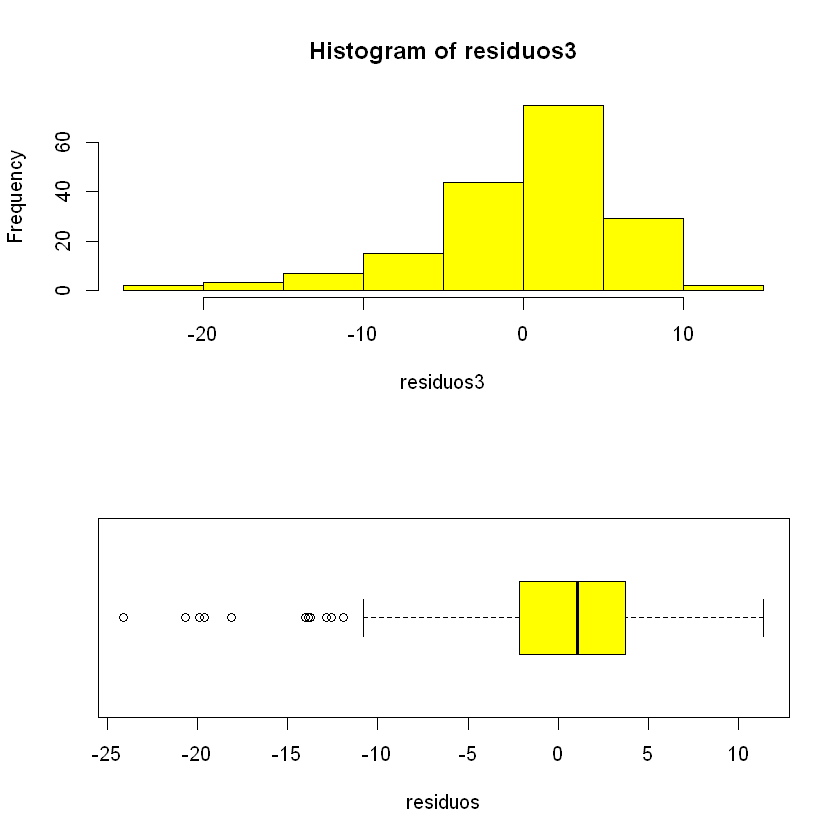

In [35]:
# Es interesante entonces modelar ambas, la media y la varianza. 
# Sin embargo, también se ve asimetría en los siguientes gráficos y análisis, 
# aspecto que no podría solucionarse modelando solamente varianzas distintas para 
# distribuciones simétricas, en este caso, distribuciones normales.

par(mfrow=c(2,1)) 
hist(residuos3, col="yellow") 
boxplot(residuos3, bty="l", range=1.5, col="yellow", horizontal=T, xlab="residuos")


El punto más cercano (pero sin superar) «1.5 *» rango intercuartil es el bi- gote superior o inferior.

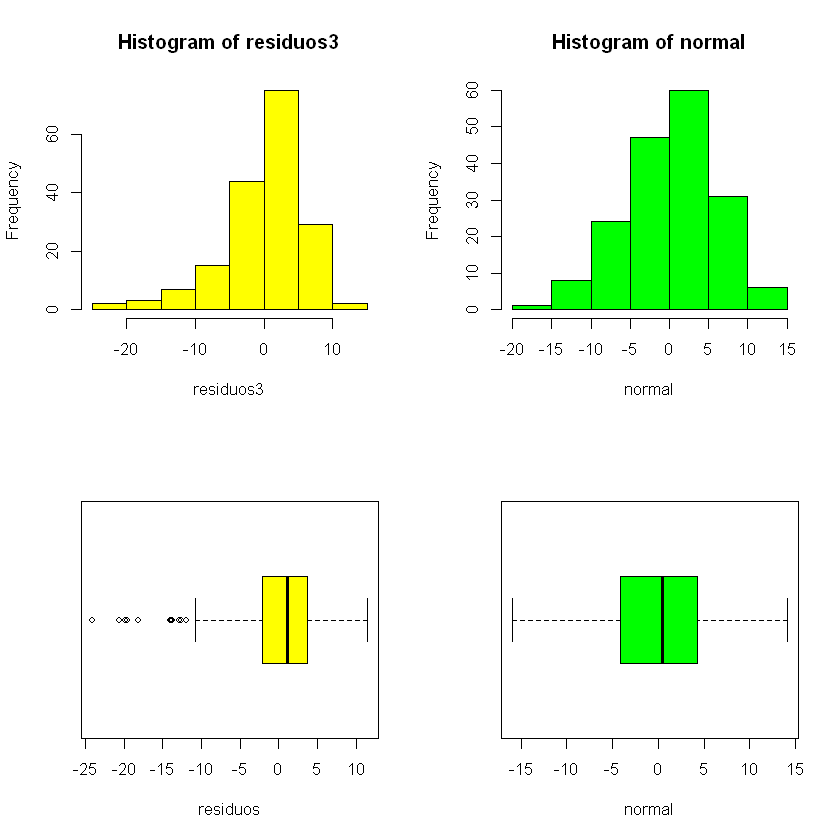

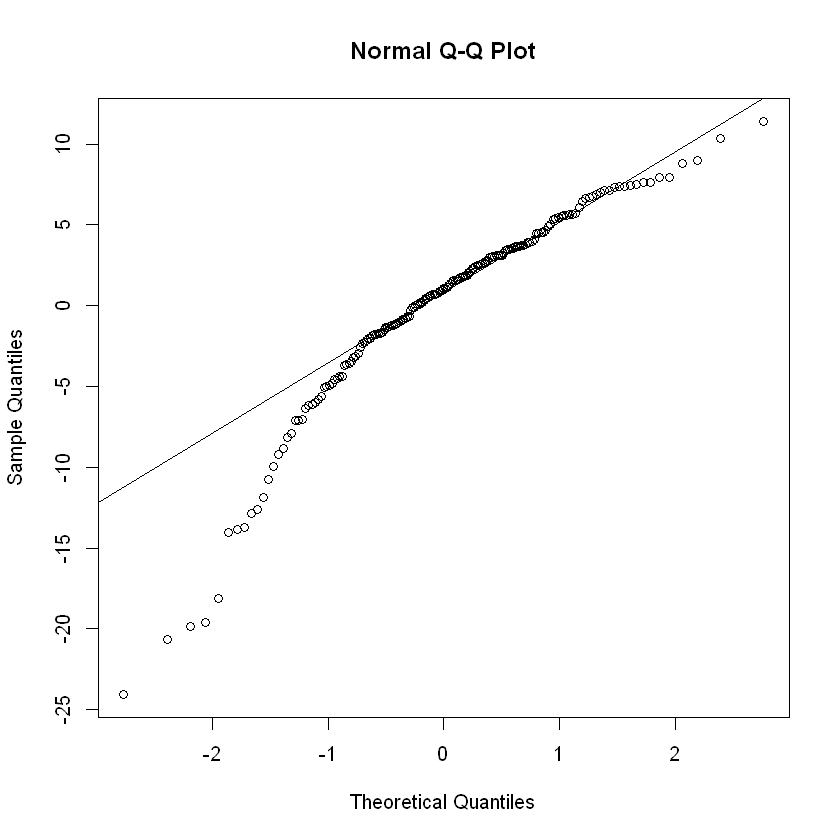

In [36]:
# Comparamos con una distribución normal de igual desvío estándar resi- dual a nuestros datos:
par(mfrow=c(2,2)) 
hist(residuos3, col="yellow")

normal=rnorm(mean=0, sd=summary(modelo3)$sigma, n=length(summary(modelo3)$residuals)) 
hist(normal, col="green")

boxplot(residuos3, bty="l", range=1.5, col="yellow", horizontal=T, xlab="residuos")
boxplot(normal, bty="l", range=1.5, col="green", horizontal=T, xlab="normal")

par(mfrow=c(1,1))
qqnorm(residuos3)
qqline(residuos3)

In [37]:
# También se puede hacer para los residuos estandarizados: plot(modelo3, which = c(2))
library(moments) 
skewness(residuos3) # debería dar cero. 
kurtosis(residuos3) # debería dar tres.


[1] -1.3176

[1] 5.358642

In [38]:
# Probemos con la normal: 
skewness(normal) 
kurtosis(normal)

[1] -0.21

[1] 2.798805

Están estimados como el tercer y el cuarto momento estandarizados, respectivamente.

In [39]:
# Test de Kolmogorov-Smirnov para evaluar normalidad: 
ks.test(residuos3,"pnorm",mean(residuos3),sd(residuos3))


	One-sample Kolmogorov-Smirnov test

data:  residuos3
D = 0.11657, p-value = 0.01629
alternative hypothesis: two-sided


In [40]:
# Alternativamente, conviene usar la modificación de Lillefors a este test: 
library(nortest) 
lillie.test(residuos3)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuos3
D = 0.11657, p-value = 3.868e-06


In [41]:
# Test de Shapiro-Wilk para evaluar normalidad:
shapiro.test(residuos3) 



	Shapiro-Wilk normality test

data:  residuos3
W = 0.91024, p-value = 6.337e-09


## 14. 3. Modelo con varianzas homogéneas utilizando «gls»

In [42]:
# Como lo hemos hecho anteriormente, recurrimos a los «gls», 
# primero ajus- tando un modelo igual al modelo 3 definido en la sección anterior (14.2.),
# es decir un modelo que supone varianzas homogéneas: 

library(nlme)
modgls= gls(vida~log10(pbi),data=datos)

¿Que hace la función «gls»? Ver: ?gls

«gls» significa generalized least squares, estimados mediante máxima verosi- militud restringida (reml). Este método de estimación utiliza el algoritmo de Newton-Raphson, y permite estimar modelos lineales generales flexibi- lizando la matriz de varianzas y covarianzas. Esto posibilita estimar tanto modelos de heterogeneidad de varianzas como modelos de autocorrelación temporal y espacial entre los residuos (estos últimos no los abarcaremos en este libro).

La función «lm» estima modelos lineales generales los cuales suponen ho- mogeneidad de varianzas y residuos independientes (correlación = 0).

In [43]:
# Corroboramos que da lo mismo que el modelo 3: 
summary(modgls) 
summary(modelo3)
anova(modgls,modelo3)

Generalized least squares fit by REML
  Model: vida ~ log10(pbi) 
  Data: datos 
       AIC      BIC   logLik
  1144.698 1154.192 -569.349

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 11.61284 3.1599179  3.675045   3e-04
log10(pbi)  15.07488 0.8269505 18.229480   0e+00

 Correlation: 
           (Intr)
log10(pbi) -0.989

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-3.9465364 -0.3498561  0.1733715  0.6128155  1.8706883 

Residual standard error: 6.099926 
Degrees of freedom: 177 total; 175 residual


Call:
lm(formula = vida ~ log10(pbi), data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.074  -2.134   1.058   3.738  11.411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.613      3.160   3.675 0.000316 ***
log10(pbi)    15.075      0.827  18.229  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.1 on 175 degrees of freedom
Multiple R-squared:  0.655,	Adjusted R-squared:  0.6531 
F-statistic: 332.3 on 1 and 175 DF,  p-value: < 2.2e-16


,call,Model,df,AIC,BIC,logLik
modgls,"gls(model = vida ~ log10(pbi), data = datos)",1,3,1144.698,1154.192,-569.349
modelo3,"lm(formula = vida ~ log10(pbi), data = datos)",2,3,1144.698,1154.192,-569.349


Aprovechamos para practicar la fórmula de «aic» y «bic».

In [44]:
#  «aic»:
-2*summary(modgls)$logLik + 2 * 3

[1] 1144.698

En R «log» es el logaritmo natural. E
l modelo consta de tres parámetros: 

• Ordenada al origen. 
• Pendiente. 
• varianza.

In [45]:
# «bic»:
-2*summary(modgls)$logLik + log(length(datos[,1])-2)*3

[1] 1154.192

## 14. 4. Modelo de varianza fijada

Incorporamos un modelo que supone que la varianza varía proporcional- mente con el pbi: 
«Var[i] = Var * pbi[i]».

Un aspecto interesante de este modelo es que no incorpora nuevos pará- metros. pbi debería ser positivo ya que las varianzas son siempre positivas. Asume una relación lineal positiva entre «Var[i]» y «pbi[i]» con ordenada al origen igual a cero y pendiente igual a «Var».

Escriba el modelo estadístico completo para: 

a. El caso con varianzas homogéneas presentado arriba. 
b. El caso con varianzas heterogéneas (fijadas) que se presenta a continuación.

In [46]:
# Explique las diferencias entre los modelos. 

modvarfija= gls(vida~log10(pbi), weights=varFixed(~pbi), data=datos) 
summary(modvarfija)

Generalized least squares fit by REML
  Model: vida ~ log10(pbi) 
  Data: datos 
      AIC      BIC    logLik
  1288.99 1298.485 -641.4951

Variance function:
 Structure: fixed weights
 Formula: ~pbi 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept)  5.786515  3.477200  1.664131  0.0979
log10(pbi)  16.740421  1.088318 15.381917  0.0000

 Correlation: 
           (Intr)
log10(pbi) -0.991

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-3.18576450 -0.25024408  0.01341118  0.42033523  3.15053491 

Residual standard error: 0.118227 
Degrees of freedom: 177 total; 175 residual

Aparece un nuevo término en el modelo que hace referencia al modelo de varianza ajustado.

El «summary» presenta los residuos estandarizados. En este caso cada re- siduo (valor observado - esperado) se divide por el desvío estándar que le corresponde según su pbi.

In [47]:
# ¿Cuál es la varianza en la esperanza de vida para países con pbi = 5000? 
modvarfija$sigma^2*5000

[1] 69.88806

¿Cuáles son las unidades? Interprételas.

In [48]:
# ¿Cuál es la varianza en la esperanza de vida para países con pbi = 14 000? 
anova(modgls, modvarfija)

,call,Model,df,AIC,BIC,logLik
modgls,"gls(model = vida ~ log10(pbi), data = datos)",1,3,1144.698,1154.192,-569.3490
modvarfija,"gls(model = vida ~ log10(pbi), data = datos, weights = varFixed(~pbi))",2,3,1288.990,1298.485,-641.4951


Comparamos este modelo con el anterior que consideraba la misma varianza para todas las observaciones y vemos que el ajuste empeora sensiblemente. 

Esto es lógico ya que en los gráficos anteriores observábamos menor varia- bilidad a mayor pbi. Ello es lo opuesto a lo que pusimos en el modelo, en el que indicamos que la variabilidad es mayor a mayor pbi.

In [49]:
# Entonces, para jugar un poco podemos hacer lo siguiente:

pbi2 = 1 / datos$pbi 
modvarfija2= gls(vida~log10(pbi), weights=varFixed(~pbi2), data=datos)
anova(modgls, modvarfija, modvarfija2)

,call,Model,df,AIC,BIC,logLik
modgls,"gls(model = vida ~ log10(pbi), data = datos)",1,3,1144.698,1154.192,-569.3490
modvarfija,"gls(model = vida ~ log10(pbi), data = datos, weights = varFixed(~pbi))",2,3,1288.990,1298.485,-641.4951
modvarfija2,"gls(model = vida ~ log10(pbi), data = datos, weights = varFixed(~pbi2))",3,3,1177.261,1186.755,-585.6303


¿Qué pasó?

## 14. 5. Modelo de varianza como potencia de la variable independiente

«Var[i] = var * |pbi[i]| ^ (2*Gamma)».

Si «Gamma = 0» estamos ante un caso de homogeneidad de varianzas. Por eso se dice que el «modgls» está anidado dentro del «mod- varpotencia» y se pueden comparar ambos modelos con el test de cociente de verosimilitudes. Si «Gamma = 0,5» como está multiplicado por 2 se obtiene la misma relación que con el modelo de varianza fijada presenta- do anteriormente. Sin embargo, el modelo de varianza fijada no está anidado dentro del «modvarpotencia» porque el parámetro Gamma sigue siendo parte del modelo «(Gamma = 0,5)».

b. Es un modelo muy flexible ya que representa un polinomio. 

c. No debería ser utilizado si «pbi = 0», por ejemplo, dado que las varianzas son siempre positivas.

In [50]:
modvarpotencia= gls(vida~log10(pbi), weights=varPower(form=~pbi), data=datos)
anova(modgls, modvarpotencia)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
modgls,"gls(model = vida ~ log10(pbi), data = datos)",1,3,1144.698,1154.192,-569.3490,,NA,NA
modvarpotencia,"gls(model = vida ~ log10(pbi), data = datos, weights = varPower(form = ~pbi))",2,4,1137.682,1150.342,-564.8412,1 vs 2,9.015644,0.002676786


Vemos, en cambio, que este modelo con «varpotencia» tiene mejor ajuste que aquel que considera varianzas homogéneas. Como «modgls» está anidado dentro del «modvarpotencia», ahora el co- mando anova nos da un contraste de hipótesis a partir del uso del esta- dístico que surge del cociente de verosimilitudes entre ambos modelos («Lratio»).

Plantear las hipótesis que se están contrastando.

In [51]:
# Obtenemos el cociente de verosimilitudes: 
CocVer= -2 *(summary(modgls)$logLik - summary(modvarpotencia)$logLik) 
CocVer

'log Lik.' 9.015644 (df=1)

In [52]:
# Vemos que da lo mismo que en: 
anova(modgls, modvarpotencia)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
modgls,"gls(model = vida ~ log10(pbi), data = datos)",1,3,1144.698,1154.192,-569.3490,,NA,NA
modvarpotencia,"gls(model = vida ~ log10(pbi), data = datos, weights = varPower(form = ~pbi))",2,4,1137.682,1150.342,-564.8412,1 vs 2,9.015644,0.002676786


In [54]:
# Podemos pedir el «L.Ratio» como: 
anova(modgls, modvarpotencia)$L.Ratio

[1]       NA 9.015644

In [55]:
# Luego, el valor de «p» utilizando la distribución de «Chi^2» como: 
pchisq(CocVer, df=1, lower.tail=FALSE)

'log Lik.' 0.002676786 (df=1)

In [56]:
# Compare con: 
anova(modgls, modvarpotencia)$"p-value"

[1]          NA 0.002676786

En el capítulo 8 veremos con más detalle de qué se trata la distribución «Chi^2».

Esta comparación también nos sirve como un análisis inferencial para evaluar el supuesto de homogeneidad de varianzas. En este caso concluimos que hay heterogeneidad de varianzas y que es necesario modelarlas.

In [57]:
summary(modvarpotencia)

Generalized least squares fit by REML
  Model: vida ~ log10(pbi) 
  Data: datos 
       AIC      BIC    logLik
  1137.682 1150.342 -564.8412

Variance function:
 Structure: Power of variance covariate
 Formula: ~pbi 
 Parameter estimates:
     power 
-0.1567466 

Coefficients:
               Value Std.Error  t-value p-value
(Intercept) 14.49056  3.330230  4.35122       0
log10(pbi)  14.33500  0.827417 17.32501       0

 Correlation: 
           (Intr)
log10(pbi) -0.992

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-4.6447929 -0.3575733  0.2412761  0.6718730  1.6396152 

Residual standard error: 23.26609 
Degrees of freedom: 177 total; 175 residual

Vemos que la potencia es negativa («Gamma estimado = -0.157»), es decir que a mayor pbi, menor varianza. Similar a lo que observamos en el gráfico.

## 14. 6. Residuos de Pearson

«e[i] = ( y[i] - E(y[i]) ) / sqrt(Var(y[i]))». 
La «e» significa valor esperado. ¿Qué es el valor esperado?

In [60]:
residuos_p=resid(modvarpotencia, type="pearson")

Le pedimos los residuos estandarizados según Pearson que tienen en cuenta la varianza correspondiente para cada residual.

Los siguientes son los residuos sin estandarizar con los que veníamos tra- bajando previamente. 
Eran útiles porque suponíamos homogeneidad de varianzas. 
En cambio ahora estamos modelando la heterogeneidad de varianzas:

In [61]:
residuos_c=resid(modvarpotencia, type="response")

In [63]:
# Los comparamos:
data.frame(residuos_p,residuos_c)

residuos_p,residuos_c
-1.88734416,-14.4206015
1.28588959,7.5471520
0.64381081,3.8102947
-3.27368462,-20.0081402
0.34695563,1.8179901
1.14760212,7.1372756
0.48712218,2.2050346
0.10933359,0.4920205
-0.11488915,-0.6405056
-0.53851186,-2.6225301


Veamos cómo pasamos de los residuos ordinarios a los residuos estandarizados según el modelo propuesto.

Primero necesitamos el «Gamma», lamentablemente lo guardaron como atributo dentro del objeto del modelo y entonces el código para obtenerlo es algo largo, ver:

In [68]:
Gamma = attr(modvarpotencia$apVar, which="Pars" )[1]
Gamma

varStruct.power 
     -0.1567466

Vemos que es el mismo valor que nos daba el «summary(modvarpotencia)». En el caso de que resulte muy complejo entender el código anterior, simple- mente copie y pegue el valor del «Gamma» del «summary».

In [69]:
summary(modvarpotencia)

Generalized least squares fit by REML
  Model: vida ~ log10(pbi) 
  Data: datos 
       AIC      BIC    logLik
  1137.682 1150.342 -564.8412

Variance function:
 Structure: Power of variance covariate
 Formula: ~pbi 
 Parameter estimates:
     power 
-0.1567466 

Coefficients:
               Value Std.Error  t-value p-value
(Intercept) 14.49056  3.330230  4.35122       0
log10(pbi)  14.33500  0.827417 17.32501       0

 Correlation: 
           (Intr)
log10(pbi) -0.992

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-4.6447929 -0.3575733  0.2412761  0.6718730  1.6396152 

Residual standard error: 23.26609 
Degrees of freedom: 177 total; 175 residual

Seguimos ahora obteniendo el desvío estándar correspondiente a cada uni- dad experimental según su valor de pbi con nuestro modelo:

In [70]:
DS = sqrt( (modvarpotencia$sigma^2) * (datos$pbi ^ (2*Gamma)) )
DS

[1] 7.640685 5.869207 5.918345 6.111811 5.239835 6.219295 4.526656 4.500177
  [9] 5.574988 4.869958 4.780803 7.400243 5.109720 5.367644 4.571016 5.808128
 [17] 7.427371 6.112142 6.338566 5.764616 5.317933 5.530070 4.342544 5.423064
 [25] 7.623374 8.908007 7.166537 7.069592 4.521667 6.487261 8.339196 7.350330
 [33] 5.265272 5.779013 5.796170 7.859139 9.252484 6.382434 5.531722 7.378534
 [41] 5.203517 5.548053 4.738397 4.854705 4.561901 6.974807 5.891830 5.803280
 [49] 5.963385 6.006764 5.135703 8.657319 5.084784 8.140417 6.336329 4.608885
 [57] 4.628740 5.289802 8.122999 6.299422 4.595147 7.488811 4.683405 5.600561
 [65] 6.091662 7.998143 8.607471 6.397624 7.659197 6.482180 4.435465 5.054567
 [73] 4.513114 6.731188 6.386773 5.355596 6.469193 4.499059 4.743624 4.723591
 [81] 5.804796 4.631039 6.101676 5.441161 7.399051 7.294835 4.791768 4.378545
 [89] 7.039813 6.924369 5.269411 5.285818 7.377645 8.854736 5.333760 5.157739
 [97] 4.040565 4.102411 5.647964 7.870734 8.058415 5.310816 6.106860 7.723121
[105] 4.877258 7.200942 5.379583 5.391590 6.785949 6.564372 6.300790 8.026383
[113] 7.590298 6.131625 7.632798 4.491566 4.787551 6.786779 8.443152 6.983795
[121] 4.296111 4.826336 6.782027 5.426489 7.097755 6.326957 5.703457 6.564759
[129] 5.079120 4.930583 4.998436 4.012000 5.420883 5.232166 7.885090 6.121720
[137] 7.248106 4.884092 7.250357 5.491634 8.019397 4.361294 4.958841 4.763959
[145] 7.122920 7.951999 5.569923 4.705417 6.279423 6.712979 5.665712 6.176290
[153] 4.576273 4.455034 6.249896 7.201254 7.637181 5.760420 6.835550 8.027290
[161] 6.102676 5.016318 5.745454 5.683047 5.997512 7.654710 5.992875 4.539023
[169] 4.598589 4.398063 5.375934 6.788600 6.354548 5.411731 6.751367 7.439837
[177] 8.949426

In [71]:
# Ahora, dividimos los residuos comunes por su desvío estándar:
res_pearson=residuos_c/DS

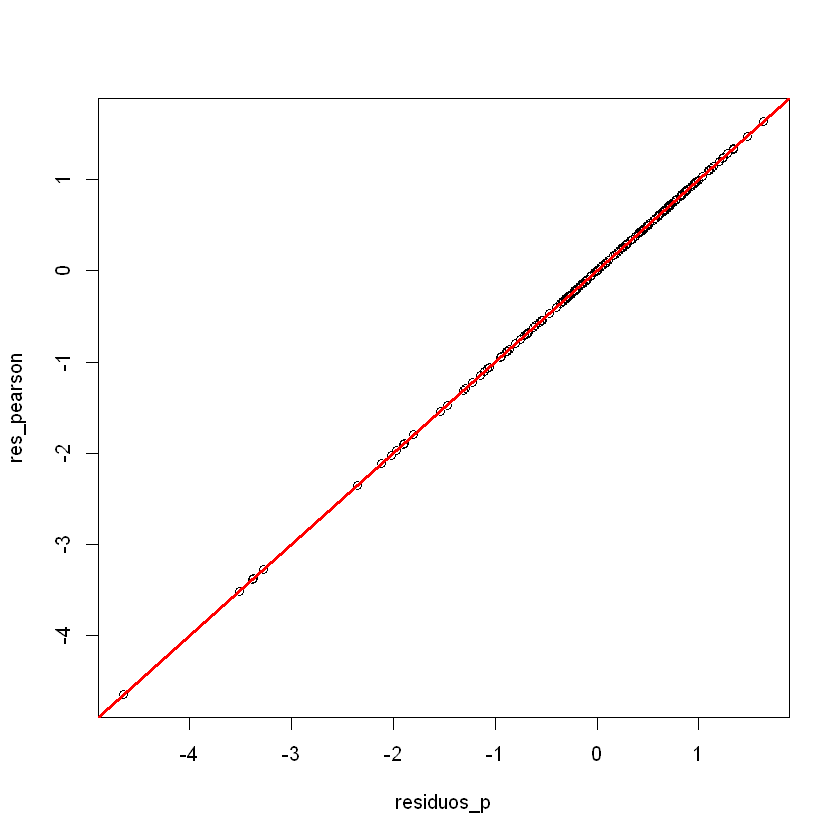

In [73]:
# Comparamos los residuos de Pearson que obtuvimos paso a paso con aque- llos que obtuvimos con la función «resid».

plot(residuos_p,res_pearson) 
abline(a=0, b=1, col="red", lw=3)

¡Genial!

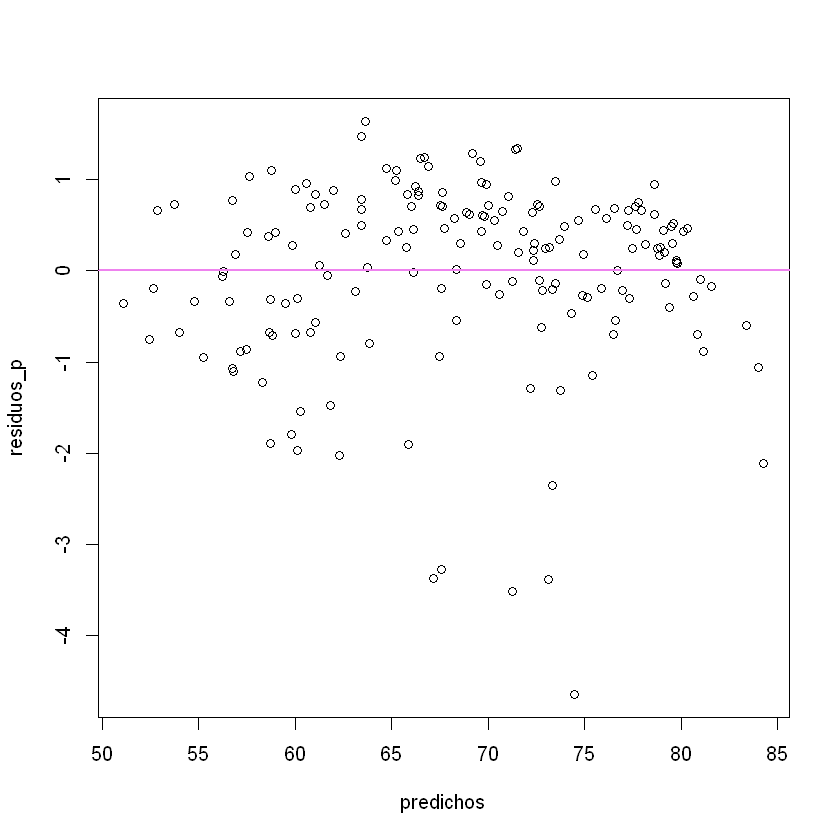

In [74]:
# Vemos algunos supuestos: 
predichos=fitted(modvarpotencia) 
plot(predichos,residuos_p) 
abline(a=0,b=0, col="violet", lw=2)

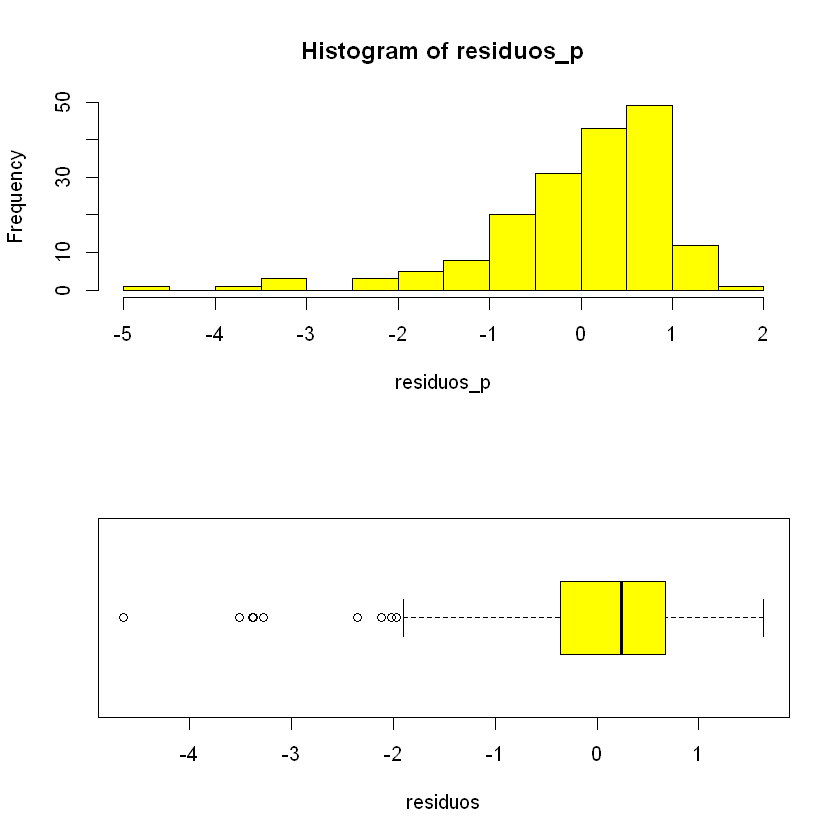

In [76]:
# ¿Por qué la distribución parece asimétrica? 
par(mfrow=c(2,1)) 
hist(residuos_p, col="yellow") 
boxplot(residuos_p, bty="l", range=1.5, col="yellow", horizontal=T, xlab="residuos")

El punto más cercano (pero sin superar), «1.5 *» rango intercuartil es el bi- gote superior o inferior.

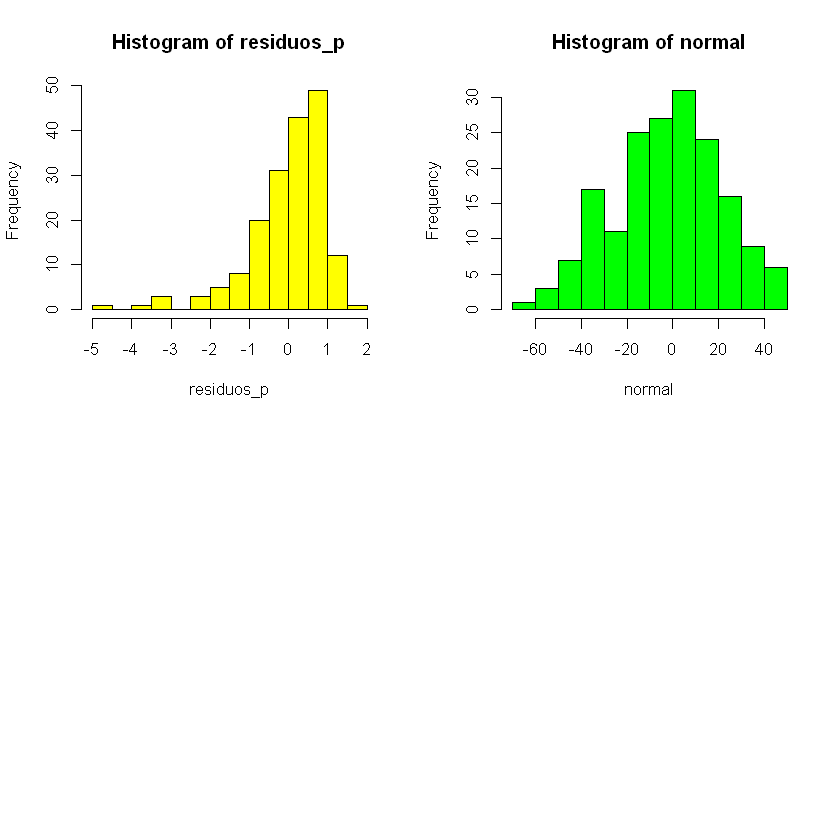

In [77]:
# Comparamos con una distribución normal de igual desvío estándar resi- dual a nuestros datos: 

par(mfrow=c(2,2)) 
hist(residuos_p, col="yellow")

normal=rnorm(mean=0, sd=summary(modvarpotencia)$sigma, n=length(residuos_p))
hist(normal, col="green")

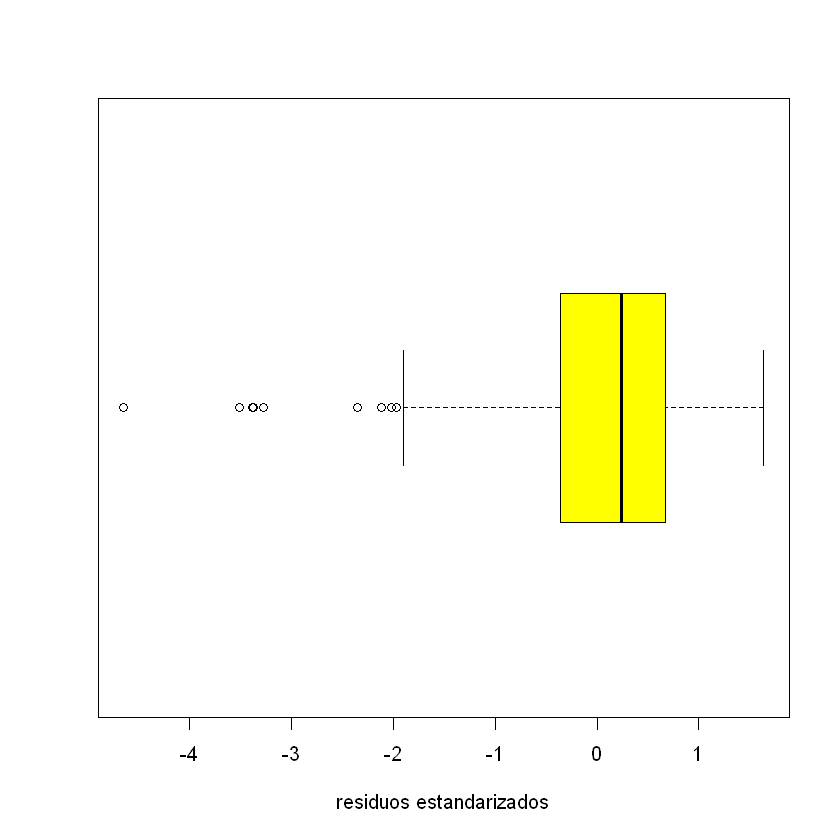

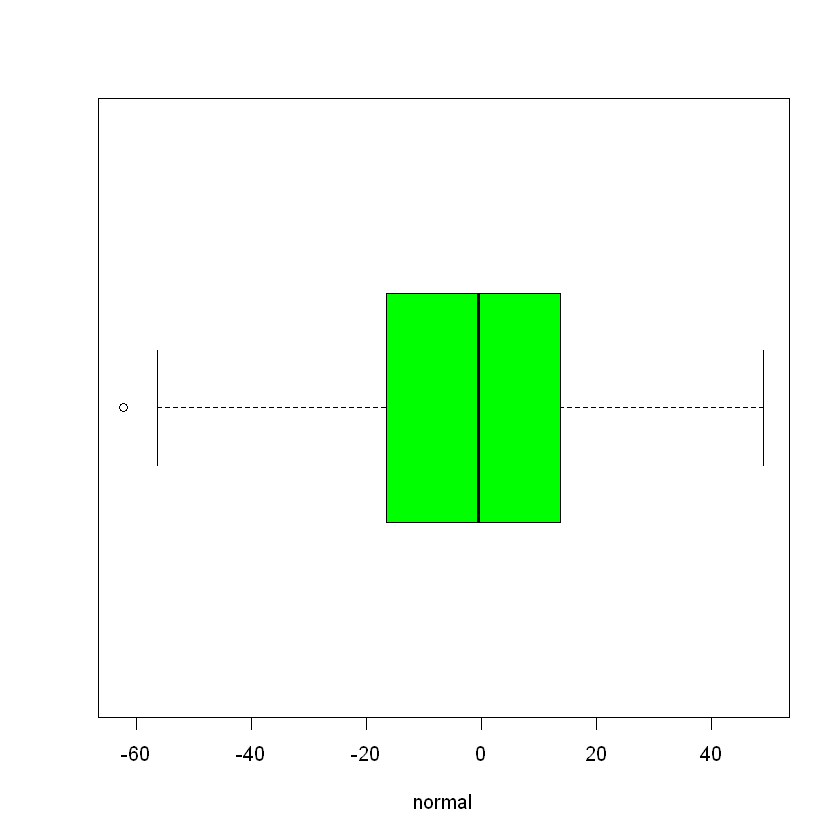

In [80]:
boxplot(residuos_p, bty="l", range=1.5, col="yellow", horizontal=T, xlab="residuos estandarizados")
boxplot(normal, bty="l", range=1.5, col="green", horizontal=T, xlab="normal")

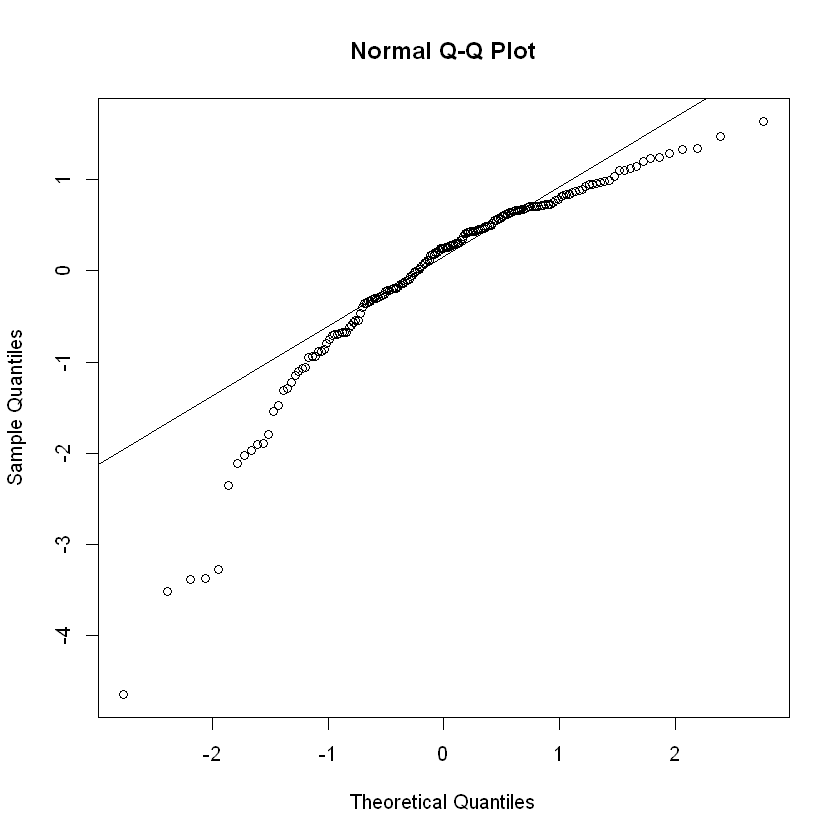

In [81]:
par(mfrow=c(1,1)) 
qqnorm(residuos_p)
qqline(residuos_p)

In [82]:
library(moments)
skewness(residuos_p)  # debería dar cero.

[1] -1.66414

In [83]:
# Asimetría negativa: 
kurtosis(residuos_p)   #  debería dar tres

[1] 6.881826

In [84]:
# Probemos con la normal 
skewness(normal) 
kurtosis(normal)

[1] -0.1435088

[1] 2.5945

Están estimados como el tercer y el cuarto momento estandarizados, respectivamente.

In [85]:
# Test de Kolmogorov-Smirnov para evaluar normalidad: 
ks.test(residuos_p,"pnorm",mean(residuos3),sd(residuos3))


	One-sample Kolmogorov-Smirnov test

data:  residuos_p
D = 0.40128, p-value < 2.2e-16
alternative hypothesis: two-sided


In [86]:
# Alternativamente, conviene usar la modificación de Lillefors a este test: 
library(nortest) 
lillie.test(residuos_p)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuos_p
D = 0.11776, p-value = 2.857e-06


In [87]:
# Test de Shapiro-Wilk para evaluar normalidad:
shapiro.test(residuos_p)


	Shapiro-Wilk normality test

data:  residuos_p
W = 0.87323, p-value = 4.596e-11


¿El modelo es adecuado?

## 14. 7. Modelo constante más potencia de la variable independiente

«Var[i] = var * (Gamma1 + |pbi[i]| ^ Gamma2 )^2»

In [88]:
modvarconst= gls(vida~log10(pbi), weights=varConstPower(form=~pbi), data=datos)
anova(modgls, modvarpotencia,modvarconst)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
modgls,"gls(model = vida ~ log10(pbi), data = datos)",1,3,1144.698,1154.192,-569.3490,,NA,NA
modvarpotencia,"gls(model = vida ~ log10(pbi), data = datos, weights = varPower(form = ~pbi))",2,4,1137.682,1150.342,-564.8412,1 vs 2,9.015644e+00,0.002676786
modvarconst,"gls(model = vida ~ log10(pbi), data = datos, weights = varConstPower(form = ~pbi))",3,5,1139.682,1155.506,-564.8412,2 vs 3,1.236272e-07,0.999719459


Hasta ahora, el mejor modelo es el que tiene en cuenta la potencia del pbi para modelar la varianza («modvarpotencia»).

Sin embargo, aún no encontramos un modelo adecuado, dado que no se cumplen los supuestos de este análisis. 

Este ejemplo sirve para comprender qué significa el supuesto de homoge- neidad de varianzas y cómo puede modelarse la heterogeneidad de varian- zas en caso de que este supuesto no se cumpla. 

Recordemos que, además, en caso de existir heterogeneidad de varianzas este es un aspecto en sí mis- mo interesante, tanto como modelar las tendencias promedio. Este ejem- plo también sirve para recordar el concepto de asimetría. 

Por ahora estamos modelando variables con distribución normal, la cual es simétrica.

En otros apartados veremos ejemplos con modelos adecuados y heteroge- neidad de varianzas que, al combinarse con la experiencia lograda con este ejemplo, lograrán una comprensión abarcativa del tema.

## Trabajo práctico N° 15. 
## Ejemplos de modelos de heterogeneidad de varianza aplicados a la macroeconomía y la producción minera.

# 15. 1. Ejercicio 1

Generalmente, en los modelos de análisis macroeconómico, herencia de John Maynard Keynes, se supone que el consumo del individuo promedio de un país depende positivamente del ingreso del que dispone, pero a una tasa menos que proporcional. 

Es decir que incrementos de una unidad de ingreso generan aumentos del consumo mayores a 0 pero menores a 1. Un economista se propone evaluar dicho modelo conceptual con datos de 34 países de la Organización para la Cooperación y el Desarrollo Económicos (ocde). 

A su vez, reconociendo las diferencias entre economías con distin- to nivel de desarrollo, plantea la posibilidad de que dicha propensión mar- ginal a consumir (el incremento en el consumo por unidad de incremento del ingreso) sea diferente entre ellas. Entonces, las variables son:

Consumo: es el consumo per cápita valuado en usd a precios constantes. «yd»: es el ingreso per cápita también valuado en usd a precios constantes. «desarr»: es el nivel de desarrollo del país.

In [92]:
datos = read.table("datos_p_15.txt", header = T, dec = ",")

# 15. 1. 1. Consignas a resolver

a. Indique unidad experimental, muestra y población. ¿De qué tipo son las variables de interés?

b. Presente una medida de la correlación lineal entre el consumo
y el ingreso per cápita. Indique si la siguiente afirmación es verdadera o falsa (justifique): «El coeficiente de correlación de Pearson brinda una medida adecuada de la asociación lineal así como no lineal entre dos variables cuantitativas siempre y cuan- do ambas se distribuyan de acuerdo a una misma distribución de probabilidad».

c. Plantee (y además estime) un modelo estadístico relevante de acuerdo a los objetivos del economista. Verifique los supuestos del modelo.

d. Escriba la recta estimada para los países de desarrollo bajo. ¿Qué interpretación tiene el intercepto en términos del problema? ¿Y el coeficiente de regresión parcial? Indique las unidades de ambos coeficientes.

e. El economista sospecha que podría mejorar la bondad de ajuste de su modelo si considerara varianzas diferentes entre econo-
mías de dispar desarrollo. Indague mediante un gráfico si las sospechas del economista son fundadas. Estime un modelo que contemple una varianza distinta para cada nivel de la variable categórica.

f. ¿Cuál de los dos modelos es preferible? Plantee las hipótesis adecuadas y concluya. ¿Qué nivel de desarrollo posee mayor varianza? ¿Cuáles son las ventajas (o desventajas) del modelo elegido sobre el coeficiente de correlación de Pearson planteado en el punto 2?


## 15. 2. Ejercicio 2

Una empresa carbonífera en West Virginia analizó la producción promedio de tres minas. Cuatro grupos de empleados trabajaron en cada mina y se registró en toneladas la produccción de carbón resultante por día. Se utilizó un modelo con dos factores que consideró a cada “grupo” como un bloque. Como nuevo supervisor administrativo, usted debe determinar si existen diferencias en la productividad promedio de las minas.

In [93]:
carbon=c(42.7,47.1,32.1,29.2, 54.1, 59.2, 53.1, 41.1, 56.9, 59.2, 58.7, 49.2)
mina=c(1,1,1,1,2,2,2,2,3,3,3,3)
mina=as.factor(mina)
grupo=c(1,2,3,4,1,2,3,4,1,2,3,4) 
grupo=as.factor(grupo)
datos=data.frame(carbon,grupo,mina)

15. 2. 1. Modelo con varianzas homogéneas entre minas

In [95]:
# Escriba el modelo y estime sus parámetros: 
modelo=with(datos, lm(carbon ~ mina + grupo)) 
modelo 
summary(modelo)


Call:
lm(formula = carbon ~ mina + grupo)

Coefficients:
(Intercept)        mina2        mina3       grupo2       grupo3       grupo4  
     40.458       14.100       18.225        3.933       -3.267      -11.400  



Call:
lm(formula = carbon ~ mina + grupo)

Residuals:
   Min     1Q Median     3Q    Max 
-5.092 -1.852  0.425  1.998  3.283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   40.458      2.514  16.094 3.66e-06 ***
mina2         14.100      2.514   5.609  0.00137 ** 
mina3         18.225      2.514   7.250  0.00035 ***
grupo2         3.933      2.903   1.355  0.22419    
grupo3        -3.267      2.903  -1.125  0.30342    
grupo4       -11.400      2.903  -3.927  0.00774 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.555 on 6 degrees of freedom
Multiple R-squared:  0.9362,	Adjusted R-squared:  0.883 
F-statistic: 17.61 on 5 and 6 DF,  p-value: 0.001584


In [96]:
# Evalúe las hipótesis de interés: 
anova(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
mina,2,730.63500,365.31750,28.90488,0.0008313665
grupo,3,381.90333,127.30111,10.07240,0.0093062707
Residuals,6,75.83167,12.63861,NA,NA


In [97]:
# «install.packages(“agricolae”)» 
library(agricolae)

Warning message:
"package 'agricolae' was built under R version 3.6.2"
Attaching package: 'agricolae'

The following objects are masked from 'package:moments':

    kurtosis, skewness



In [98]:
HSD.test(modelo,"mina", console=TRUE)


Study: modelo ~ "mina"

HSD Test for carbon 

Mean Square Error:  12.63861 

mina,  means

  carbon      std r  Min  Max
1 37.775 8.503872 4 29.2 47.1
2 51.875 7.663931 4 41.1 59.2
3 56.000 4.639684 4 49.2 59.2

Alpha: 0.05 ; DF Error: 6 
Critical Value of Studentized Range: 4.339195 

Minimun Significant Difference: 7.713099 

Treatments with the same letter are not significantly different.

  carbon groups
3 56.000      a
2 51.875      a
1 37.775      b


El análisis continúa con la evaluación de los supuestos.

1        2        3 
3.573293 1.655155 3.125581

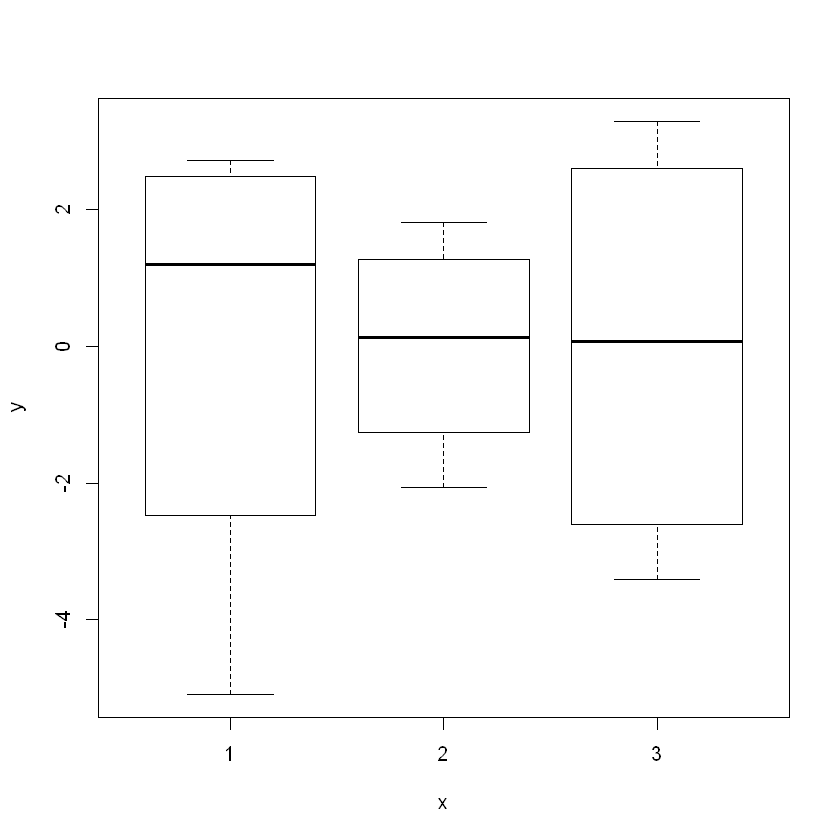

In [99]:
# Miremos entonces la heterogeneidad de varianzas primero: 
datos$residuos=resid(modelo) 
plot(datos$mina,datos$residuos) 
tapply(datos$residuos,datos$mina,sd)

In [102]:
# Otro gráfico interesante (sin acentos en las secuencias):
medias=with(datos,tapply(carbon,mina,mean)) 
medias

1      2      3 
37.775 51.875 56.000

1        2        3 
3.573293 1.655155 3.125581

In [105]:
desvios=with(datos,tapply(residuos,mina,sd)) 
desvios

1        2        3 
3.573293 1.655155 3.125581

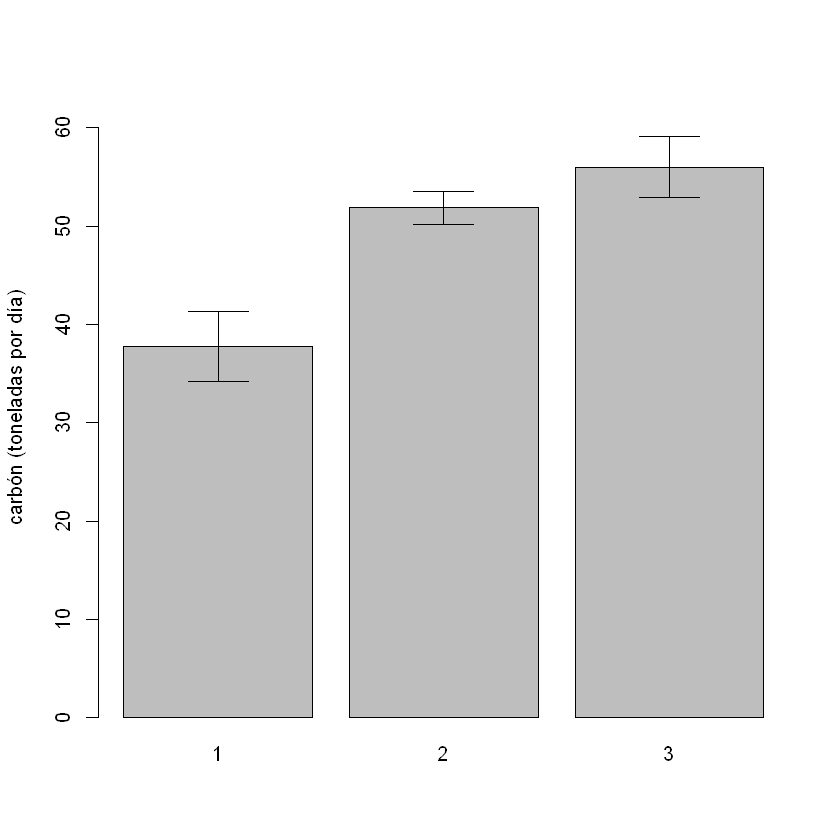

In [106]:
# Ojo que estamos graficando el desvío estándar y no el error estándar. 
fig= barplot(medias,ylim=c(0,63),ylab= "carbón (toneladas por día)")
arrows(fig,medias+desvios,fig,medias-desvios, angle=90,code=3)

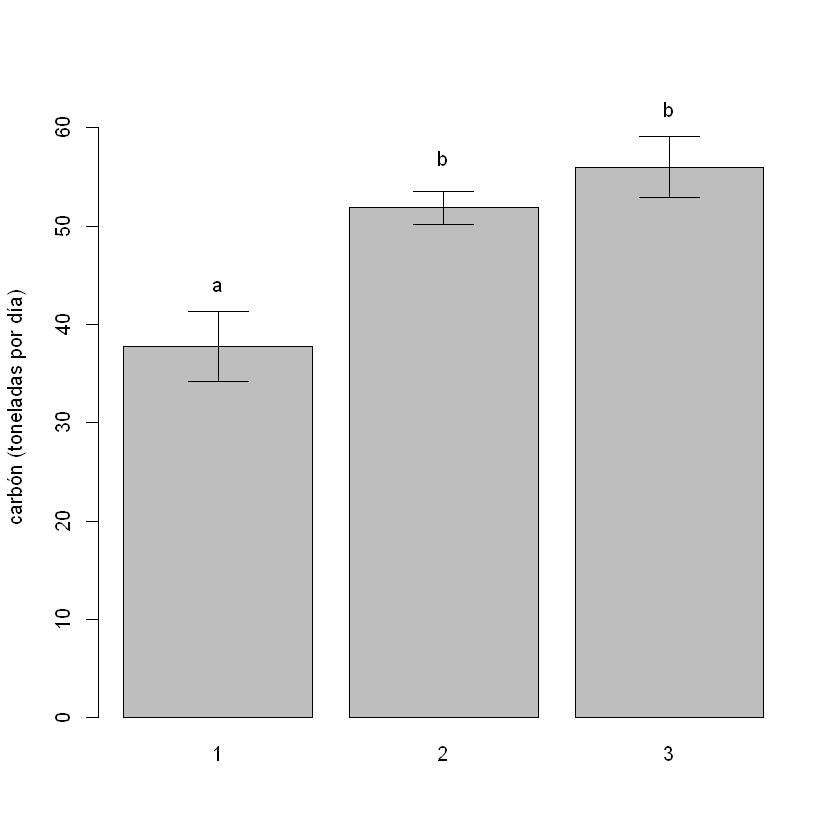

In [109]:
fig= barplot(medias,ylim=c(0,63),ylab= "carbón (toneladas por día)")
arrows(fig,medias+desvios,fig,medias-desvios, angle=90,code=3)
# Agregamos al gráfico los resultados del test de Tukey: 
text(0.7,44,"a") 
text(1.9,57,"b")
text(3.1,62,"b")

# Figura 15. 1. Media de producción de carbón en toneladas por día según las minas 1, 2 y 3 
# con el correspondiente desvío estándar

Aparentemente la mina 2 tiene menor varianza. Vamos a evaluarlo utilizando un test inferencial.

### 15. 2. 2. Modelo varianzas distintas para cada mina

In [110]:
library(nlme) 
modgls=gls(carbon ~ mina + grupo, data=datos)

Ahora proponemos que las distintas minas tienen también distintas varianzas.

In [112]:
modident=gls(carbon~mina + grupo, varIdent(form= ~ 1 | mina),data=datos)
summary(modident)

Generalized least squares fit by REML
  Model: carbon ~ mina + grupo 
  Data: datos 
       AIC      BIC    logLik
  54.48482 52.61066 -18.24241

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | mina 
 Parameter estimates:
           1            2            3 
1.0000000000 0.0000238258 0.7592904237 

Coefficients:
              Value Std.Error   t-value p-value
(Intercept)  40.000 2.3047052     17.36   0e+00
mina2        14.100 2.3047052      6.12   9e-04
mina3        18.225 2.8937792      6.30   7e-04
grupo2        5.100 0.0001553  32836.91   0e+00
grupo3       -1.000 0.0001553  -6438.61   0e+00
grupo4      -13.000 0.0001553 -83701.94   0e+00

 Correlation: 
       (Intr) mina2  mina3  grupo2 grupo3
mina2  -1.000                            
mina3  -0.796  0.796                     
grupo2  0.000  0.000  0.000              
grupo3  0.000  0.000  0.000  0.500       
grupo4  0.000  0.000  0.000  0.500  0.500

Standardized residuals:
          Min 

In [113]:
anova(modgls,modident)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
modgls,"gls(model = carbon ~ mina + grupo, data = datos)",1,7,52.31623,50.85854,-19.15811,,NA,NA
modident,"gls(model = carbon ~ mina + grupo, data = datos, correlation = varIdent(form = ~1 | mina))",2,9,54.48482,52.61066,-18.24241,1 vs 2,1.831402,0.4002359


Cuando evaluamos si los residuos cuentan con distribución normal lo ha- cemos a partir de métodos gráficos y métodos inferenciales. 
En los primeros scripts del curso evaluamos el supuesto de homogeneidad de varianzas solo a partir de métodos gráficos. La secuencia aquí descrip- ta es una manera adecuada de evaluar este supuesto utilizando métodos inferenciales.

In [116]:
# Es interesante saber el tipo de funciones disponibles para modelar la varianza: 
?varClasses

Recuerden lo que dice al final respecto de que pueden incorporar cualquier función que ustedes deseen simplemente con un poco más de notación.

## Lista de referencias bibliográficas

Pinheiro J. C. y Bates D. M. (2000). Mixed-effects models in S and S-plus, capítulo 5. Nueva York, EUA: Springer.

Wasserstein, R. (Ed.) (2016). Declaración de la Asociación de Estadística Americana so- bre la significancia estadística y los valores-P [Traducción de Laco Mazzone, F; Grampa, M; Goldenberg M.; Aristimuño F.; Oddi, F. y Garibaldi, L. A.], The Ame- rican Statistician, 70.